## 1. Logistic Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from functools import reduce
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
# File paths for 2015-2016 data
blood_pressure_path= "./Data/BPX_I.XPT"
demographic_path= "./Data/DEMO_I.XPT"
dietary_path = "./Data/DR1TOT_I.XPT"
body_measures_path = "./Data/BMX_I.XPT"
physical_path = "./Data/PAQ_I.XPT"
physical = pd.read_sas(physical_path)
blood_pressure = pd.read_sas(blood_pressure_path)
demographic = pd.read_sas(demographic_path)
dietary = pd.read_sas(dietary_path)
body_measures = pd.read_sas(body_measures_path)

/var/folders/ct/9f006jjj4_s3bt3mcwlfd_d80000gn/T/ipykernel_17732/412022322.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dietary = pd.read_sas(dietary_path)
/var/folders/ct/9f006jjj4_s3bt3mcwlfd_d80000gn/T/ipykernel_17732/412022322.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dietary = pd.read_sas(dietary_path)
/var/folders/ct/9f006jjj4_s3bt3mcwlfd_d80000gn/T/ipykernel_17732/412022322.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

In [ ]:
#Dependent Variables
patient='SEQN'
age = 'RIDAGEYR'
gender = 'RIAGENDR'
systolic_2nd_reading='BPXSY2'
diastolic_2nd_reading = 'BPXDI2'
systolic_3rd_reading='BPXSY3'
diastolic_3rd_reading = 'BPXDI3'
calcium = 'DR1TCALC'
phosphore = 'DR1TPHOS'
magnesium = 'DR1TMAGN'
iron = 'DR1TIRON'
zinc = 'DR1TZINC'
copper = 'DR1TCOPP'
sodium = 'DR1TSODI'
potassium = 'DR1TPOTA'
selenium = 'DR1TSELE'
sugar = 'DR1TSUGR'
caffeine = 'DR1TCAFF'
fat = 'DR1TTFAT'
weight = 'BMXWT'
height = 'BMXHT'
bmi = 'BMI'
activity = 'PAQ620'
race = 'RIDRETH1'
income = 'INDHHIN2'

In [ ]:
# Create a merged data frame of patients characteristics
cm_blood_pressure = blood_pressure.drop(blood_pressure.columns.difference([patient,systolic_2nd_reading, diastolic_2nd_reading, systolic_3rd_reading, diastolic_3rd_reading]), axis=1, inplace=False)
cm_demographic = demographic.drop(demographic.columns.difference([patient, age, gender, race, income]), axis=1, inplace=False)
cm_dietary = dietary.drop(dietary.columns.difference([patient, calcium, phosphore, magnesium, iron, zinc, copper, sodium, potassium, selenium, sugar, caffeine, fat]), axis=1, inplace=False)
cm_body_measures = body_measures.drop(body_measures.columns.difference([patient, weight, height]), axis=1, inplace=False)
cm_physical = physical.drop(physical.columns.difference([patient, activity]), axis=1, inplace=False)

In [ ]:
#Remove NaN values
cm_blood_pressure.dropna(inplace=True)
cm_dietary.dropna(inplace=True)
cm_body_measures.dropna(inplace=True)
cm_physical.dropna(inplace=True)
cm_demographic.dropna(inplace=True)
cm_physical = cm_physical[(cm_physical[activity] == 1) | (cm_physical[activity] == 2)]
cm_physical[activity].replace(2, 0, inplace=True)
cm_demographic = cm_demographic[cm_demographic[income] != 12]
cm_demographic = cm_demographic[cm_demographic[income] != 77]
cm_demographic = cm_demographic[cm_demographic[income] != 99]
print(cm_blood_pressure)
print(cm_dietary)
print(cm_body_measures)
print(cm_physical)

         SEQN  BPXSY2  BPXDI2  BPXSY3  BPXDI3
0     83732.0   124.0    64.0   116.0    62.0
1     83733.0   140.0    88.0   134.0    82.0
2     83734.0   132.0    44.0   136.0    46.0
3     83735.0   134.0    68.0   136.0    70.0
4     83736.0   114.0    54.0    98.0    56.0
...       ...     ...     ...     ...     ...
9537  93696.0   116.0    76.0   114.0    72.0
9538  93697.0   146.0    58.0   144.0    52.0
9541  93700.0   106.0    66.0   104.0    68.0
9542  93701.0   114.0    46.0   114.0    52.0
9543  93702.0   114.0    68.0   124.0    64.0

[7231 rows x 5 columns]
         SEQN  DR1TSUGR  DR1TTFAT  DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  \
0     83732.0     42.31     79.24     623.0    1052.0     255.0     16.01   
1     83733.0    180.84     77.91     594.0    1414.0     262.0     11.01   
2     83734.0     62.87     91.97     872.0    1527.0     497.0     26.17   
3     83735.0     54.77     49.23    1284.0    1439.0     318.0      9.07   
4     83736.0     71.84     19.63     

In [ ]:
# Add a new column 'systolic_bp' with the average of 'systolic_1st_reading' and 'systolic_2nd_reading'
cm_blood_pressure['systolic_bp'] = cm_blood_pressure[[systolic_2nd_reading, systolic_3rd_reading]].mean(axis=1)
cm_blood_pressure['diastolic_bp'] = cm_blood_pressure[[diastolic_2nd_reading, diastolic_3rd_reading]].mean(axis=1)
cm_blood_pressure = cm_blood_pressure.drop([systolic_2nd_reading, systolic_3rd_reading], axis=1)
cm_blood_pressure = cm_blood_pressure.drop([diastolic_2nd_reading, diastolic_3rd_reading], axis=1)

In [ ]:
def categorize_hypertension(row):
    if row['systolic_bp'] < 130 and row['diastolic_bp'] < 80:
        return 0
    else:
        return 1
def categorize_income(row):
    if row[income] == 13:
        return 'Poor'
    elif row[income] <= 4 :
        return 'Poor'
    elif row[income] >4 and row[income]<10:
        return 'Middle'
    elif row[income] >= 10:
        return 'Rich'
cm_blood_pressure['hypertension'] = cm_blood_pressure.apply(categorize_hypertension,axis=1)
cm_demographic['income_category'] = cm_demographic.apply(categorize_income,axis=1)

In [ ]:
dataframes = [cm_blood_pressure, cm_dietary, cm_demographic, cm_body_measures, cm_physical]
merged_data = reduce(lambda left, right: pd.merge(left, right, on='SEQN'), dataframes)
merged_data.drop(patient,axis=1,inplace=True)
merged_data[bmi] = merged_data[weight] / ((0.01)*merged_data[height])**2
data_male = merged_data[merged_data[gender] == 1]
data_female = merged_data[merged_data[gender] == 2]
print(merged_data)
print(len(merged_data[merged_data['hypertension'] == 0]))
print(len(merged_data[merged_data['hypertension'] == 1]))

      systolic_bp  diastolic_bp  hypertension  DR1TSUGR  DR1TTFAT  DR1TCALC  \
0           120.0          63.0             0     42.31     79.24     623.0   
1           137.0          85.0             1    180.84     77.91     594.0   
2           134.0          45.0             1     62.87     91.97     872.0   
3           135.0          69.0             1     54.77     49.23    1284.0   
4           106.0          55.0             0     71.84     19.63      72.0   
...           ...           ...           ...       ...       ...       ...   
5394        112.0          74.0             0     67.39     65.74     249.0   
5395        111.0          47.0             0     64.07     87.47     646.0   
5396        115.0          74.0             0     40.70     82.23     610.0   
5397        145.0          55.0             1     52.88     60.05     883.0   
5398        119.0          66.0             0     42.70     42.88     525.0   

      DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  ...  

In [ ]:
merged_data['hypertension']

0       0
1       1
2       1
3       1
4       0
       ..
5394    0
5395    0
5396    0
5397    1
5398    0
Name: hypertension, Length: 5399, dtype: int64

In [ ]:
merged_data.columns

Index(['systolic_bp', 'diastolic_bp', 'hypertension', 'DR1TSUGR', 'DR1TTFAT',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'INDHHIN2', 'income_category', 'BMXWT', 'BMXHT', 'PAQ620',
       'BMI'],
      dtype='object')

In [ ]:
train_set, test_set = train_test_split(merged_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = test_set['hypertension']
logreg1 = smf.logit(formula = 'hypertension ~DR1TSUGR + DR1TTFAT + \
                    DR1TCALC + DR1TPHOS + DR1TMAGN + DR1TIRON + DR1TZINC + DR1TCOPP + \
                    DR1TSODI + DR1TPOTA + DR1TSELE + DR1TCAFF + C(RIAGENDR) + RIDAGEYR + \
                    C(RIDRETH1) + INDHHIN2 + C(income_category) + BMXWT + BMXHT + C(PAQ620) + BMI',
                       data = train_set).fit()
print(logreg1.summary())
threshold = 0.5
y_prob1 = logreg1.predict(test_set)
y_pred1 = pd.Series([1 if x > threshold else 0 for x in y_prob1], index=y_prob1.index)
cm1 = confusion_matrix(y_test, y_pred1)
accuracy_log1 = accuracy_score (y_test, y_pred1)
print ("Confusion Matrix : \n", cm1)
print("Accuracy Logistic Regression: \n", accuracy_log1)

Optimization terminated successfully.
         Current function value: 0.509852
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                 4319
Model:                          Logit   Df Residuals:                     4293
Method:                           MLE   Df Model:                           25
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1926
Time:                        20:30:38   Log-Likelihood:                -2202.0
converged:                       True   LL-Null:                       -2727.4
Covariance Type:            nonrobust   LLR p-value:                1.047e-205
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.3545      2.723      1.232      0.218      

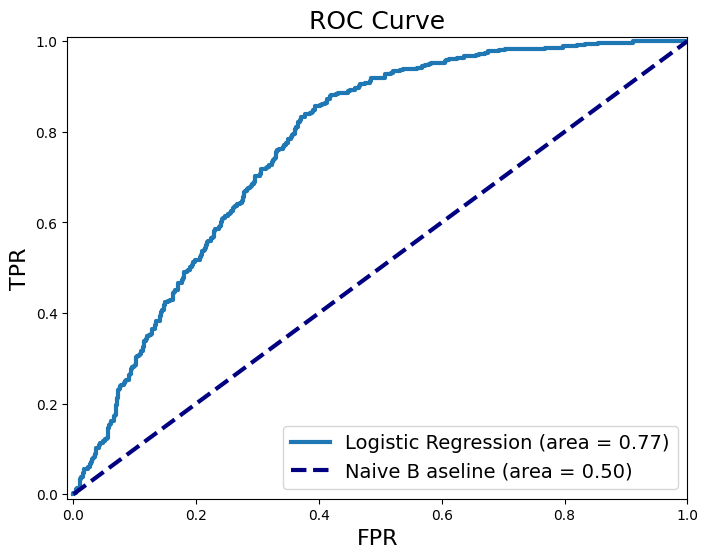

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive B aseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['hypertension', 'DR1TSUGR', 'DR1TTFAT',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'RIDAGEYR', 'INDHHIN2',
        'BMXWT', 'BMXHT', 'BMI']
VIF(train_set, cols)

hypertension     1.271988
DR1TSUGR         1.468870
DR1TTFAT         3.131218
DR1TCALC         3.104383
DR1TPHOS        10.834233
DR1TMAGN         5.367468
DR1TIRON         2.287866
DR1TZINC         2.451122
DR1TCOPP         2.481263
DR1TSODI         3.762851
DR1TPOTA         4.279212
DR1TSELE         3.557046
DR1TCAFF         1.185064
RIDAGEYR         1.423973
INDHHIN2         1.060230
BMXWT           83.409596
BMXHT           16.271589
BMI             66.023533
dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = test_set['hypertension']
logreg1 = smf.logit(formula = 'hypertension ~DR1TSUGR + DR1TTFAT + \
                    DR1TCALC + DR1TPHOS + DR1TMAGN + DR1TIRON + DR1TZINC + DR1TCOPP + \
                    DR1TSODI + DR1TPOTA + DR1TSELE + DR1TCAFF + C(RIAGENDR) + RIDAGEYR + \
                    C(RIDRETH1) + INDHHIN2 + C(income_category)  + BMXHT + C(PAQ620) + BMI',
                       data = train_set).fit()
print(logreg1.summary())
threshold = 0.5
y_prob2 = logreg1.predict(test_set)
y_pred2 = pd.Series([1 if x > threshold else 0 for x in y_prob2], index=y_prob2.index)
cm2 = confusion_matrix(y_test, y_pred2)
accuracy_log2 = accuracy_score (y_test, y_pred2)
print ("Confusion Matrix : \n", cm2)
print("Accuracy Logistic Regression: \n", accuracy_log2)

Optimization terminated successfully.
         Current function value: 0.511799
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                 4319
Model:                          Logit   Df Residuals:                     4294
Method:                           MLE   Df Model:                           24
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1895
Time:                        20:30:39   Log-Likelihood:                -2210.5
converged:                       True   LL-Null:                       -2727.4
Covariance Type:            nonrobust   LLR p-value:                5.880e-203
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.1375      0.948     -7.531      0.000      

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['hypertension', 'DR1TSUGR', 'DR1TTFAT',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'RIDAGEYR', 'INDHHIN2',
     'BMXHT', 'BMI']
VIF(train_set, cols)

hypertension     1.262140
DR1TSUGR         1.468298
DR1TTFAT         3.131169
DR1TCALC         3.104340
DR1TPHOS        10.830598
DR1TMAGN         5.363213
DR1TIRON         2.287790
DR1TZINC         2.450327
DR1TCOPP         2.480917
DR1TSODI         3.761497
DR1TPOTA         4.274595
DR1TSELE         3.557042
DR1TCAFF         1.184470
RIDAGEYR         1.409266
INDHHIN2         1.058455
BMXHT            1.120940
BMI              1.089004
dtype: float64

remove 'DR1TPHOS'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = test_set['hypertension']
logreg1 = smf.logit(formula = 'hypertension ~DR1TSUGR + DR1TTFAT + \
                    DR1TCALC + DR1TMAGN + DR1TIRON + DR1TZINC + DR1TCOPP + \
                    DR1TSODI + DR1TPOTA + DR1TSELE + DR1TCAFF + C(RIAGENDR) + RIDAGEYR + \
                    C(RIDRETH1) + INDHHIN2 + C(income_category)  + BMXHT + C(PAQ620) + BMI',
                       data = train_set).fit()
print(logreg1.summary())
threshold = 0.5
y_prob2 = logreg1.predict(test_set)
y_pred2 = pd.Series([1 if x > threshold else 0 for x in y_prob2], index=y_prob2.index)
cm2 = confusion_matrix(y_test, y_pred2)
accuracy_log2 = accuracy_score (y_test, y_pred2)
print ("Confusion Matrix : \n", cm2)
print("Accuracy Logistic Regression: \n", accuracy_log2)

accuracy = ((cm2.ravel()[0] + cm2.ravel()[3]) / sum(cm2.ravel()))
TPR =  ((cm2.ravel()[3]) / (cm2.ravel()[2] + cm2.ravel()[3]))
FPR =  ((cm2.ravel()[1]) / (cm2.ravel()[0] + cm2.ravel()[1]))
print(f'Accuracy: {accuracy}')
print(f'TPR: {TPR}')
print(f'FPR: {FPR}')

Optimization terminated successfully.
         Current function value: 0.512058
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                 4319
Model:                          Logit   Df Residuals:                     4295
Method:                           MLE   Df Model:                           23
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1891
Time:                        20:30:40   Log-Likelihood:                -2211.6
converged:                       True   LL-Null:                       -2727.4
Covariance Type:            nonrobust   LLR p-value:                2.599e-203
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.0979      0.947     -7.497      0.000      

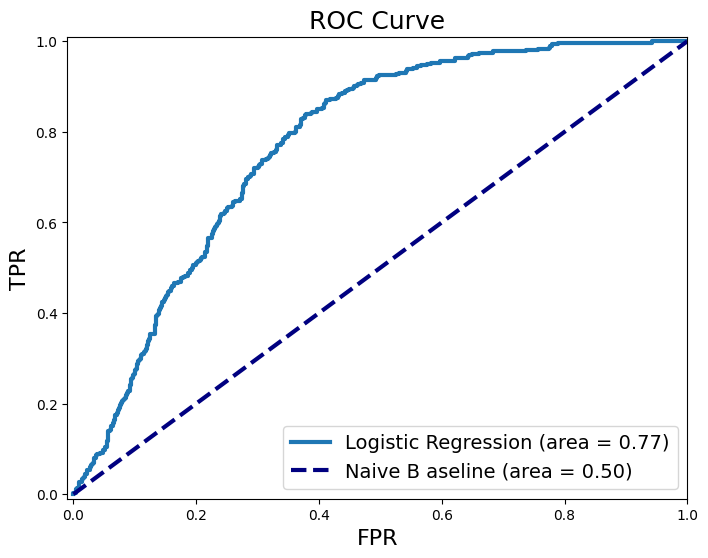

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob2)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive B aseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['hypertension', 'DR1TSUGR', 'DR1TTFAT',
       'DR1TCALC', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP',
       'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'RIDAGEYR', 'INDHHIN2',
     'BMXHT', 'BMI']
VIF(train_set, cols)

hypertension    1.261471
DR1TSUGR        1.466199
DR1TTFAT        2.973589
DR1TCALC        2.032223
DR1TMAGN        4.819427
DR1TIRON        2.280575
DR1TZINC        2.388690
DR1TCOPP        2.456533
DR1TSODI        3.673382
DR1TPOTA        4.066954
DR1TSELE        2.851706
DR1TCAFF        1.178550
RIDAGEYR        1.407701
INDHHIN2        1.058241
BMXHT           1.120936
BMI             1.088961
dtype: float64

remove 'DR1TCALC', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSELE', 'DR1TCAFF'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = test_set['hypertension']
logreg1 = smf.logit(formula = 'hypertension ~DR1TSUGR + DR1TTFAT + \
                    DR1TSODI + DR1TPOTA + C(RIAGENDR) + RIDAGEYR + \
                    C(RIDRETH1) + INDHHIN2 + C(income_category)  + BMXHT + C(PAQ620) + BMI',
                       data = train_set).fit()
print(logreg1.summary())
threshold = 0.5
y_prob2 = logreg1.predict(test_set)
y_pred2 = pd.Series([1 if x > threshold else 0 for x in y_prob2], index=y_prob2.index)
cm2 = confusion_matrix(y_test, y_pred2)
accuracy_log2 = accuracy_score (y_test, y_pred2)
print ("Confusion Matrix : \n", cm2)
print("Accuracy Logistic Regression: \n", accuracy_log2)

Optimization terminated successfully.
         Current function value: 0.513097
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                 4319
Model:                          Logit   Df Residuals:                     4302
Method:                           MLE   Df Model:                           16
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1875
Time:                        20:30:40   Log-Likelihood:                -2216.1
converged:                       True   LL-Null:                       -2727.4
Covariance Type:            nonrobust   LLR p-value:                1.636e-207
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.1862      0.942     -7.628      0.000      

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = test_set['hypertension']
logreg1 = smf.logit(formula = 'hypertension ~ DR1TTFAT + \
                    DR1TSODI + DR1TPOTA + C(RIAGENDR) + RIDAGEYR + \
                    C(RIDRETH1)  + C(income_category)  + BMXHT + C(PAQ620) + BMI',
                       data = train_set).fit()
print(logreg1.summary())
threshold = 0.5
y_prob2 = logreg1.predict(test_set)
y_pred2 = pd.Series([1 if x > threshold else 0 for x in y_prob2], index=y_prob2.index)
cm2 = confusion_matrix(y_test, y_pred2)
accuracy_log2 = accuracy_score (y_test, y_pred2)
print ("Confusion Matrix : \n", cm2)
print("Accuracy Logistic Regression: \n", accuracy_log2)

Optimization terminated successfully.
         Current function value: 0.513556
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                 4319
Model:                          Logit   Df Residuals:                     4304
Method:                           MLE   Df Model:                           14
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1867
Time:                        20:30:41   Log-Likelihood:                -2218.0
converged:                       True   LL-Null:                       -2727.4
Covariance Type:            nonrobust   LLR p-value:                1.586e-208
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.0816      0.938     -7.549      0.000      

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['hypertension', 'DR1TTFAT',
       'DR1TSODI', 'DR1TPOTA',  'RIDAGEYR',
     'BMXHT', 'BMI']
VIF(train_set, cols)

hypertension    1.256439
DR1TTFAT        2.646167
DR1TSODI        2.785900
DR1TPOTA        1.813139
RIDAGEYR        1.302413
BMXHT           1.078907
BMI             1.076948
dtype: float64